In [19]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from collections import defaultdict

current_directory = os.getcwd()

quic_tbf = defaultdict(dict)
h1_tbf = defaultdict(dict)
quic_loss = defaultdict(dict)
h1_loss = defaultdict(dict)

for filename in os.listdir(current_directory):
    if filename.endswith('.json'):
        with open(filename, 'r') as file:
            data = json.load(file)
                
            print(f"Processing {filename}...")
            if 'h1_tbf' in filename:
                h1_tbf[filename] = data
            elif 'quic_tbf' or 'inspect' in filename:
                quic_tbf[filename] = data
            elif 'h1_netem' in filename:
                h1_loss[filename] = data
            elif 'quic_netem' in filename:
                quic_loss[filename] = data
            file.close()
                
        


  


Processing network_inspect_quic_LATime.json...
Processing network_inspect_quic_tbf0.5m32k70ms_LATime.json...
Processing network_inspect_h1_LATime.json...
Processing network_inspect_h1_tbf0.5m32k70ms_LATime.json...


In [7]:
#print(quic_tbf.keys())

tc_order = ['50k', '100k','0.5m','1m','1g', '5g','10g']
quic_throughputs = []
h1_throughputs = []
for size in tc_order:
    for key in quic_tbf.keys():
        if size in key:
            print(size, key)
            quic_throughputs.append(quic_tbf[key][-1]['throughput'])
            break
    for key in h1_tbf.keys():
        if size in key:
            print(size, key)
            h1_throughputs.append(h1_tbf[key][-1]['throughput'])
            break
    print('-------')
    

-------
-------
0.5m network_inspect_quic_tbf0.5m32k70ms_LATime.json
0.5m network_inspect_h1_tbf0.5m32k70ms_LATime.json
-------
-------
-------
-------
-------


ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

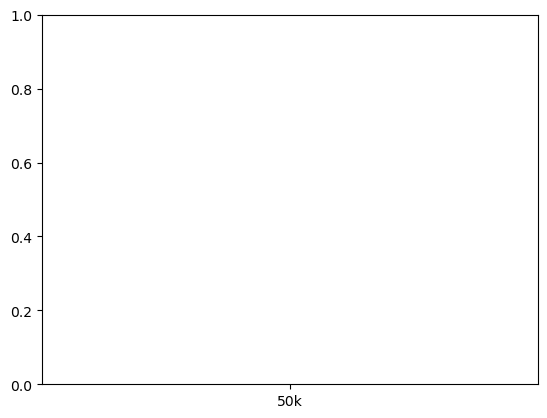

In [3]:

  
# plot lines
plt.plot(tc_order, quic_throughputs, label = "HTTP3")
plt.plot(tc_order, h1_throughputs, label = "HTTP1")
plt.xlabel("Congestion level")
plt.gca().set_ylabel("Throughput")

plt.legend()
plt.show()

In [13]:
loss_percent = ['Loss5', 'Loss10','Loss20','Loss50']
quic_throughputs = []
h1_throughputs = []
for size in loss_percent:
    for key in quic_loss.keys():
        if size in key:
            print(size, key)
            quic_throughputs.append(quic_loss[key][-1]['throughput'])
            break
    for key in h1_loss.keys():
        if size in key:
            print(size, key)
            h1_throughputs.append(h1_loss[key][-1]['throughput'])
            break
    print('-------')

Loss5 network_inspect_quic_netemLoss5_ucsd.json
Loss5 network_inspect_h1_netemLoss50_ucsd.json
-------
Loss10 network_inspect_quic_netemLoss10_ucsd.json
Loss10 network_inspect_h1_netemLoss10_ucsd.json
-------
Loss20 network_inspect_quic_netemLoss20_ucsd.json
Loss20 network_inspect_h1_netemLoss20_ucsd.json
-------
Loss50 network_inspect_quic_netemLoss50_ucsd.json
Loss50 network_inspect_h1_netemLoss50_ucsd.json
-------


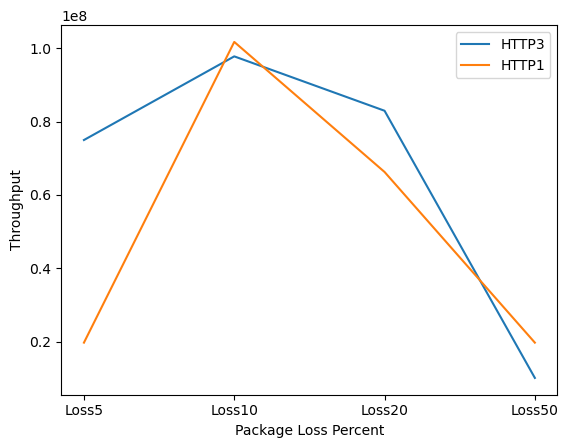

In [15]:
  
# plot lines
plt.plot(loss_percent, quic_throughputs, label = "HTTP3")
plt.plot(loss_percent, h1_throughputs, label = "HTTP1")
plt.xlabel("Package Loss Percent")
plt.gca().set_ylabel("Throughput")
plt.legend()
plt.show()

In [20]:
congestion = "inspect"
intervals = []

url_pre = 'https://10'

quic_intervals = {}
for key in quic_tbf.keys():
    if congestion in key:
        datas = quic_tbf[key]
        for data in datas:
            if 'protocol' in data and data['protocol']=="h3":
                abs_time = data["timing"]["requestTime"]
                quic_intervals[data["url"]]= (((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"])))

h1_intervals = {}

url_pre = 'https://10.10.1.2'
for key in h1_tbf.keys():
    if congestion in key:
        datas = h1_tbf[key]
        for data in datas:
            if "url" in data and url_pre in data['url'] and 'timing' in data:
                abs_time = data["timing"]["requestTime"]
                h1_intervals[data["url"]] = ((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"]))
            elif "url" in data and data['url'] in quic_intervals.keys() and 'timing' in data:
                abs_time = data["timing"]["requestTime"] 
                h1_intervals[data["url"]] = ((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"]))
                





                                      
                                      
                                      


['https://10.10.1.2:8000/', 'https://10.10.1.2:8000/styleguide/735-c738dbd3.bundle.js', 'https://10.10.1.2:8000/styleguide/assets/icon-play-circle-outline-14x14-333333.svg', 'https://10.10.1.2:8000/styleguide/carousel-897357e5.bundle.js', 'https://adservice.google.com/adsid/integrator.js?domain=10.10.1.2', 'https://api.permutive.com/adv/v2/segment?new-session=false&k=5d77544a-6fe3-4644-bf31-bccb6eef1a61', 'https://api.permutive.com/v2.0/identify?k=5d77544a-6fe3-4644-bf31-bccb6eef1a61', 'https://api.permutive.com/v2.0/watson?k=5d77544a-6fe3-4644-bf31-bccb6eef1a61', 'https://htlb.casalemedia.com/openrtb/pbjs?s=958618', 'https://rtb.openx.net/openrtbb/prebidjs']


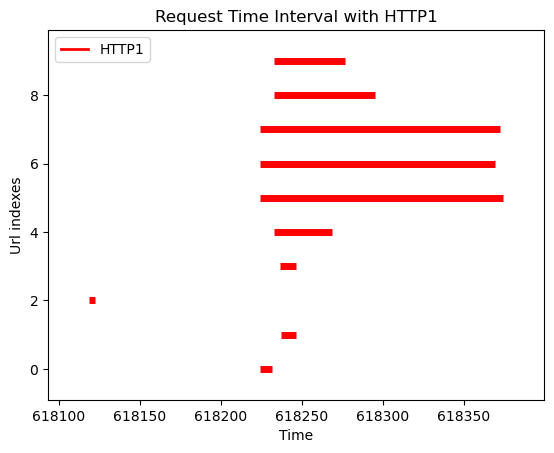

In [21]:
from matplotlib.lines import Line2D # Imported for legends
from matplotlib import collections  as mc
intervals = []

keys = sorted(h1_intervals.keys())
print(keys)
for k in keys:
    intervals.append(h1_intervals[k])
    


num_intervals = len(intervals)
viridis = plt.cm.get_cmap('viridis', 2)


colors = ['r' for i in range(num_intervals)]

# Prepare the input data in correct format for LineCollection 
lines = [[(i[0], j), (i[1], j)] for i, j in zip(intervals, range(len(intervals)))]

lc = mc.LineCollection(lines, colors= colors, linewidths=5)
fig, ax = plt.subplots()

ax.add_collection(lc)
ax.margins(0.1)

ax.set_ylabel('Url indexes')
ax.set_xlabel('Time')
plt.title("Request Time Interval with HTTP1")



# Adding the legends
def make_proxy(col, scalar_mappable, **kwargs):
    color = col 
    return Line2D([0, 1], [0, 1], color=color, **kwargs)
proxies = [make_proxy('r', lc, linewidth=2)]
ax.legend(proxies, ['HTTP1'],loc='upper left')



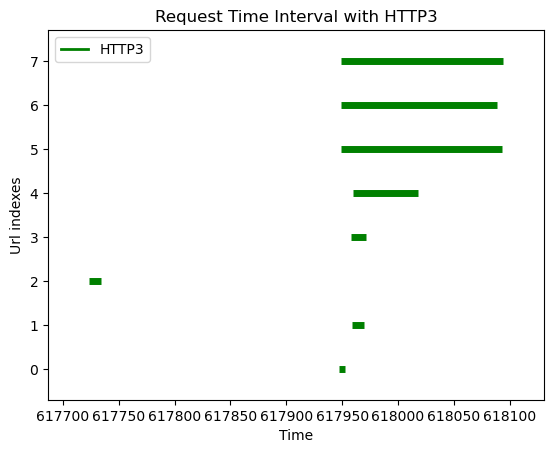

In [25]:
intervals=[]
for k in keys:
    k = k.replace(':8000',':4433')
    intervals.append(quic_intervals[k])



num_intervals = len(intervals)
viridis = plt.cm.get_cmap('viridis', 2)


colors = ['g' for i in range(num_intervals)]

# Prepare the input data in correct format for LineCollection 
lines = [[(i[0], j), (i[1], j)] for i, j in zip(intervals, range(len(intervals)))]

lc = mc.LineCollection(lines, colors= colors, linewidths=5)
fig, ax = plt.subplots()

ax.add_collection(lc)
ax.margins(0.1)

ax.set_ylabel('Url indexes')
ax.set_xlabel('Time')
plt.title("Request Time Interval with HTTP3")

# Adding the legends
def make_proxy(col, scalar_mappable, **kwargs):
    color = col 
    return Line2D([0, 1], [0, 1], color=color, **kwargs)
proxies = [make_proxy('g', lc, linewidth=2)]
ax.legend(proxies, ['HTTP3'],loc='upper left')



In [26]:
congestion = "inspect"
intervals = []

url_pre = 'https://10'

quic_intervals = {}
for key in quic_tbf.keys():
    if congestion in key:
        datas = quic_tbf[key]
        for data in datas:
            if 'protocol' in data and data['protocol']=="h3":
                abs_time = data["timing"]["requestTime"]
                quic_intervals[data["url"]]= (((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"])))

h1_intervals = {}

url_pre = 'https://10.10.1.2'
for key in h1_tbf.keys():
    if congestion in key:
        datas = h1_tbf[key]
        for data in datas:
            if "url" in data and url_pre in data['url'] and 'timing' in data:
                abs_time = data["timing"]["requestTime"]
                h1_intervals[data["url"]] = ((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"]))
            elif "url" in data and data['url'] in quic_intervals.keys():
                abs_time = data["timing"]["requestTime"] 
                h1_intervals[data["url"]] = ((abs_time+data["timing"]["sendStart"]),(abs_time+data["timing"]["receiveHeadersEnd"]))
                





                                      
                                      
                                      


['https://10.10.1.2:8000/', 'https://10.10.1.2:8000/styleguide/735-c738dbd3.bundle.js', 'https://10.10.1.2:8000/styleguide/assets/icon-play-circle-outline-14x14-333333.svg', 'https://10.10.1.2:8000/styleguide/carousel-897357e5.bundle.js', 'https://adservice.google.com/adsid/integrator.js?domain=10.10.1.2', 'https://api.permutive.com/adv/v2/segment?new-session=false&k=5d77544a-6fe3-4644-bf31-bccb6eef1a61', 'https://api.permutive.com/v2.0/identify?k=5d77544a-6fe3-4644-bf31-bccb6eef1a61', 'https://api.permutive.com/v2.0/watson?k=5d77544a-6fe3-4644-bf31-bccb6eef1a61', 'https://htlb.casalemedia.com/openrtb/pbjs?s=958618', 'https://rtb.openx.net/openrtbb/prebidjs']


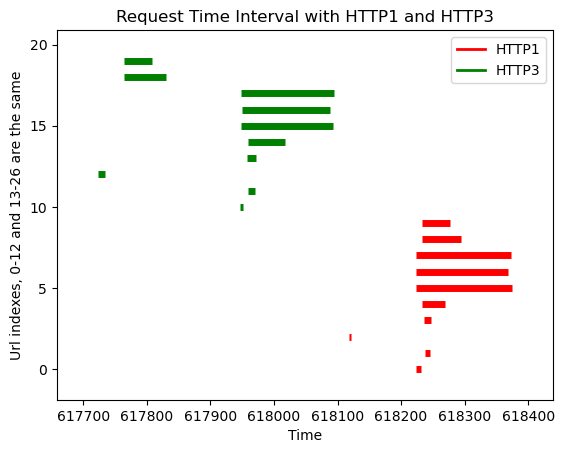

In [29]:
from matplotlib.lines import Line2D # Imported for legends
from matplotlib import collections  as mc
intervals = []

keys = sorted(h1_intervals.keys())
print(keys)
for k in keys:
    intervals.append(h1_intervals[k])
    
for k in keys:
    k = k.replace(':8000',':4433')
    intervals.append(quic_intervals[k])
    


num_intervals = len(intervals)
viridis = plt.cm.get_cmap('viridis', 2)

color_choices= ['r','g']
colors = ['r' if i < num_intervals//2 else 'g' for i in range(num_intervals)]

# Prepare the input data in correct format for LineCollection 
lines = [[(i[0], j), (i[1], j)] for i, j in zip(intervals, range(len(intervals)))]

lc = mc.LineCollection(lines, colors= colors, linewidths=5)
fig, ax = plt.subplots()

ax.add_collection(lc)
ax.margins(0.1)

ax.set_ylabel('Url indexes, 0-12 and 13-26 are the same')
ax.set_xlabel('Time')
plt.title("Request Time Interval with HTTP1 and HTTP3")



# Adding the legends
def make_proxy(color, scalar_mappable, **kwargs):

    return [Line2D([0, 1], [0, 1], color=col, **kwargs) for col in color]
proxies = make_proxy(color_choices, lc, linewidth=2)
ax.legend(proxies, ['HTTP1','HTTP3'])

